In [25]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [26]:
df = pd.read_csv('Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,9998,15584532,Liu,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,10000,15628319,Walker,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


In [28]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64

In [29]:
df.dropna(inplace=True)

In [30]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [31]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                float64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
Exited               int64
dtype: object

In [32]:
df1 = df.drop(columns=['RowNumber','CustomerId','Surname'], axis=1)

In [33]:
df1

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
5,645,Spain,Male,44.0,8,113755.78,2,1.0,0.0,149756.71,1
...,...,...,...,...,...,...,...,...,...,...,...
9997,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


In [34]:
columns = [i for i in df1.columns]

In [35]:
columns

['CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [36]:
for i in columns:
    print(f"{i} : {df1[i].unique()}")

CreditScore : [619 608 502 699 645 376 528 497 476 549 635 616 653 587 726 732 636 510
 669 846 577 756 571 574 411 591 533 553 520 722 475 490 804 850 582 472
 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725 511 614 742
 687 555 684 603 751 581 735 661 675 738 813 657 604 519 664 678 757 416
 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773 814 710
 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625 432 770
 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535 716 539
 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778 514 525
 715 580 807 501 521 759 516 711 618 643 671 689 620 676 572 695 592 567
 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771 681
 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799 602
 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644 626
 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593 801
 611 802 745 483 690 492 709 705 560 

In [37]:
df1['Gender'] = df1['Gender'].replace({'Female':0,'Male':1})

In [38]:
df2 = pd.concat([df1,pd.get_dummies(df1['Geography']).astype('float')], axis=1)

In [39]:
df2

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,619,France,0,42.0,2,0.00,1,1.0,1.0,101348.88,1,1.0,0.0,0.0
1,608,Spain,0,41.0,1,83807.86,1,0.0,1.0,112542.58,0,0.0,0.0,1.0
2,502,France,0,42.0,8,159660.80,3,1.0,0.0,113931.57,1,1.0,0.0,0.0
3,699,France,0,39.0,1,0.00,2,0.0,0.0,93826.63,0,1.0,0.0,0.0
5,645,Spain,1,44.0,8,113755.78,2,1.0,0.0,149756.71,1,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,709,France,0,36.0,7,0.00,1,0.0,1.0,42085.58,1,1.0,0.0,0.0
9998,772,Germany,1,42.0,3,75075.31,2,1.0,0.0,92888.52,1,0.0,1.0,0.0
9999,772,Germany,1,42.0,3,75075.31,2,1.0,0.0,92888.52,1,0.0,1.0,0.0
10000,792,France,0,28.0,4,130142.79,1,1.0,0.0,38190.78,0,1.0,0.0,0.0


In [40]:
df2.drop('Geography', axis=1, inplace=True)

In [41]:
columns = [i for i in df2.columns]
for i in columns:
    print(f"{i} : {df2[i].unique()}")

CreditScore : [619 608 502 699 645 376 528 497 476 549 635 616 653 587 726 732 636 510
 669 846 577 756 571 574 411 591 533 553 520 722 475 490 804 850 582 472
 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725 511 614 742
 687 555 684 603 751 581 735 661 675 738 813 657 604 519 664 678 757 416
 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773 814 710
 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625 432 770
 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535 716 539
 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778 514 525
 715 580 807 501 521 759 516 711 618 643 671 689 620 676 572 695 592 567
 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771 681
 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799 602
 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644 626
 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593 801
 611 802 745 483 690 492 709 705 560 

In [42]:
df2.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited', 'France',
       'Germany', 'Spain'],
      dtype='object')

In [46]:
columns_to_scale = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']

In [47]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()

df2[columns_to_scale] = scale.fit_transform(df2[columns_to_scale])


In [48]:
df2

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,0.538,0,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,1,1.0,0.0,0.0
1,0.516,0,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0,0.0,0.0,1.0
2,0.304,0,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,1,1.0,0.0,0.0
3,0.698,0,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,0,1.0,0.0,0.0
5,0.590,1,0.351351,0.8,0.453394,0.333333,1.0,0.0,0.748797,1,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,0.718,0,0.243243,0.7,0.000000,0.000000,0.0,1.0,0.210390,1,1.0,0.0,0.0
9998,0.844,1,0.324324,0.3,0.299226,0.333333,1.0,0.0,0.464429,1,0.0,1.0,0.0
9999,0.844,1,0.324324,0.3,0.299226,0.333333,1.0,0.0,0.464429,1,0.0,1.0,0.0
10000,0.884,0,0.135135,0.4,0.518708,0.000000,1.0,0.0,0.190914,0,1.0,0.0,0.0


In [56]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df2.drop('Exited', axis=1), df2['Exited'], test_size = 0.2, random_state = 0)

In [98]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape = (12,), activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(12, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)
model.fit(x_train, y_train, epochs = 100)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7710 - loss: 0.5298
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8060 - loss: 0.4463
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8155 - loss: 0.4280
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8357 - loss: 0.3911
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8490 - loss: 0.3606
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8533 - loss: 0.3565
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8606 - loss: 0.3470
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8597 - loss: 0.3362
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8603 - loss: 0.3454
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8619 - loss: 0.3393
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8690 - loss: 0.3300
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━

In [99]:
model.evaluate(x_test, y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8479 - loss: 0.4181


[0.41664955019950867, 0.8475000262260437]

In [100]:
ypredicted = model.predict(x_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [101]:
ypredicted

array([[0.0231913 ],
       [0.2658368 ],
       [0.10590216],
       ...,
       [0.0027134 ],
       [0.07219546],
       [0.06924079]], dtype=float32)

In [102]:
y_test[:10]

5895    0
902     0
6152    0
5329    0
7982    0
4619    1
4256    0
6454    0
2673    0
9529    0
Name: Exited, dtype: int64

In [103]:
ypred = []
for element in ypredicted:
    if element > 0.5:
        ypred.append(1)
    else:
        ypred.append(0)

In [104]:
ypred[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

In [105]:
from sklearn.metrics import classification_report, confusion_matrix

In [106]:
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.91      1582
           1       0.69      0.49      0.57       418

    accuracy                           0.85      2000
   macro avg       0.78      0.71      0.74      2000
weighted avg       0.84      0.85      0.84      2000



In [107]:
cm = confusion_matrix(y_test, ypred)
cm

array([[1492,   90],
       [ 215,  203]], dtype=int64)

In [74]:
cmtf = tf.math.confusion_matrix(y_test, ypred)
cmtf

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1495,   87],
       [ 214,  204]])>

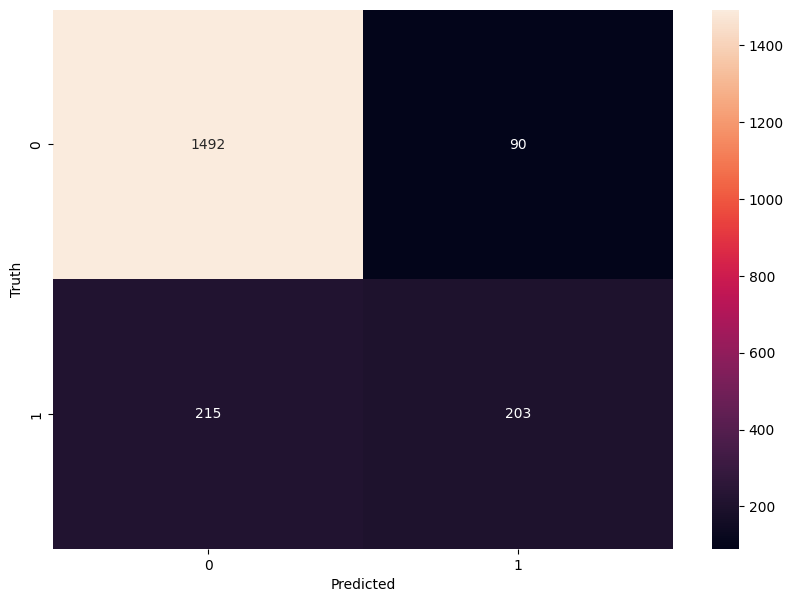

In [108]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()